# 1. 데이터 불러오기

In [64]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [65]:
train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

# 2. ML

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic',
        rc={'axes.unicode_minus': False},
        style='darkgrid')

In [67]:
# 성능지표
from sklearn.metrics import mean_squared_error, r2_score

# 성능을 저장할 dict 생성
performance = {}

### 1. LinearRegression

In [68]:
from sklearn.linear_model import LinearRegression

# Train
model_LR = LinearRegression()
model_LR.fit(train_x, train_y)

# Predict
pred_y_LR = model_LR.predict(test_x)
rmse_LR = mean_squared_error(pred_y_LR, test_y) ** 0.5
r2_LR = r2_score(pred_y_LR, test_y)
print(f"RMSE: {rmse_LR}, R2: {r2_LR}")

performance['LinearRegression'] = {'RMSE': rmse_LR, 'R2': r2_LR}

RMSE: 2402.1523559358748, R2: 0.38464759725271436


### 2. RandomForest

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Train
model_RF = RandomForestRegressor()
model_RF.fit(train_x, train_y)

# Predict
pred_y_RF = model_RF.predict(test_x)
rmse_RF = mean_squared_error(pred_y_RF, test_y) ** 0.5
r2_RF = r2_score(pred_y_LR, test_y) ** 0.5
print(f"RMSE: {rmse_RF}, R2: {r2_RF}")

performance['RandomForest'] = {'RMSE': rmse_RF, 'R2': r2_RF}

RMSE: 2389.9061424698416, R2: 0.6201996430607764


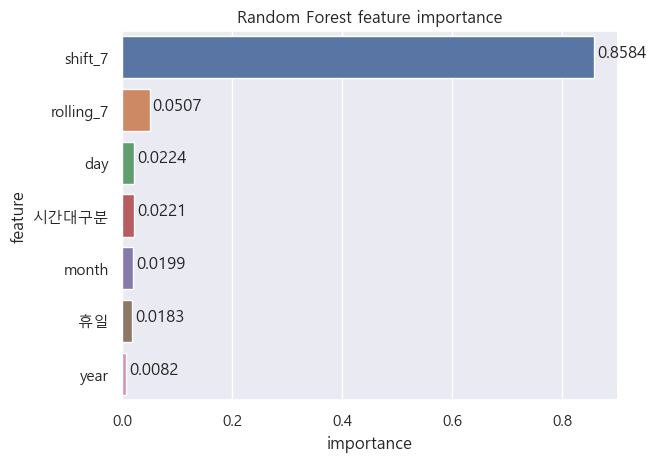

In [70]:
# feature importance 계산
RF_feature_importance_df = pd.DataFrame({'feature': list(train_x), 'importance': model_RF.feature_importances_})
RF_feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
RF_feature_importance_df.reset_index(drop=True, inplace=True)

# Visualization
axes = sns.barplot(x='importance', y='feature', data=RF_feature_importance_df)
for p in axes.patches:
    axes.text(p.get_x() + p.get_width()+ 0.05,
              p.get_y() + p.get_height()/2,
              f'{p.get_width():.4f}',
              ha='center')
plt.title('Random Forest feature importance')
plt.show()

1. shift_7의 변수가 생각보다 미치는 영향이 큰 것을 알 수 있다.

### 3. XGboost

In [71]:
from xgboost import XGBRegressor

# train
model_XGB = XGBRegressor()
model_XGB.fit(train_x, train_y)

# predict
pred_y_XGB = model_XGB.predict(test_x)
rmse_XGB = mean_squared_error(pred_y_XGB, test_y) ** 0.5
r2_XGB = r2_score(pred_y_XGB, test_y)
print(f"RMSE: {rmse_XGB}, R2: {r2_XGB}")

performance['XGB'] = {'RMSE': rmse_XGB, 'R2': r2_XGB}

RMSE: 2277.3136710487815, R2: 0.41098914080733395


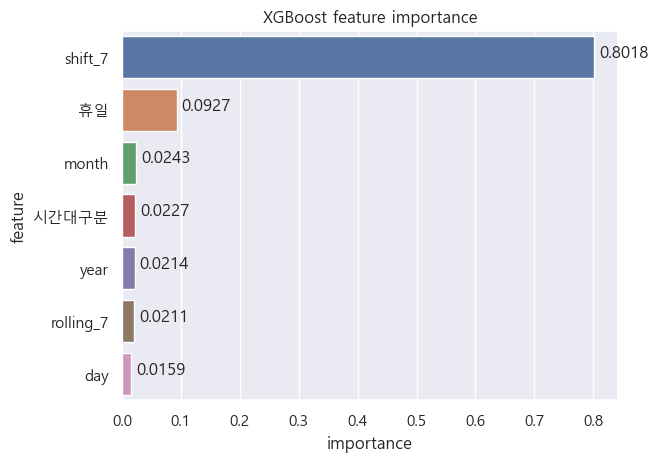

In [72]:
# feature importance
XGB_feature_importance_df = pd.DataFrame({'feature': list(train_x), 'importance': model_XGB.feature_importances_})
XGB_feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
XGB_feature_importance_df.reset_index(drop=True, inplace=True)

# Visualization
axes = sns.barplot(x='importance', y='feature', data=XGB_feature_importance_df)
for p in axes.patches:
    axes.text(p.get_x() + p.get_width() + 0.05,
              p.get_y() + p.get_height()/2,
              f'{p.get_width():.4f}',
              ha='center')
plt.title("XGBoost feature importance")
plt.show()

### 4. LGBoost

In [73]:
from lightgbm import LGBMRegressor

# train
model_LGB = LGBMRegressor()
model_LGB.fit(train_x, train_y)

# predict
pred_y_LGB = model_LGB.predict(test_x)
rmse_LGB = mean_squared_error(pred_y_LGB, test_y) ** 0.5
r2_LGB = r2_score(pred_y_LGB, test_y)
print(f"RMSE: {rmse_LGB}, R2: {r2_LGB}")

performance['LGB'] = {'RMSE': rmse_LGB, 'R2': r2_LGB}

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 43344, number of used features: 7
[LightGBM] [Info] Start training from score 37392.406374
RMSE: 2260.1270496352527, R2: 0.44327770001366185


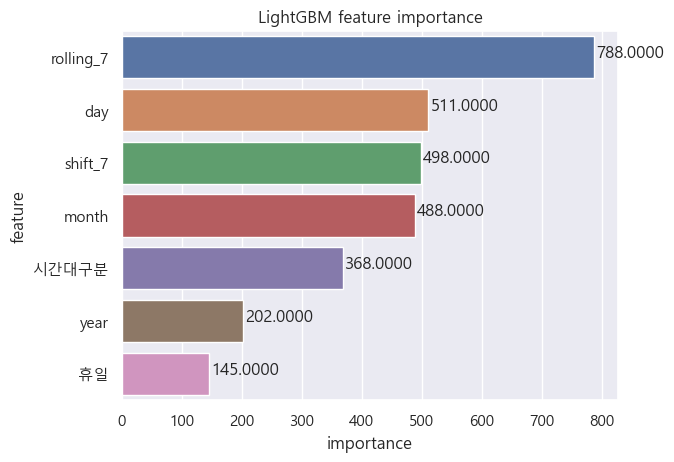

In [74]:
# feature_importance
LGB_feature_importance_df = pd.DataFrame({'feature': list(train_x), 'importance': model_LGB.feature_importances_})
LGB_feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
LGB_feature_importance_df.reset_index(drop=True, inplace=True)

# Visualization
axes = sns.barplot(x='importance', y='feature', data=LGB_feature_importance_df)
for p in axes.patches:
    axes.text(p.get_x() + p.get_width() + 60,
              p.get_y() + p.get_height()/2,
              f'{p.get_width():.4f}',
              ha='center')
plt.title("LightGBM feature importance")
plt.show()

### 5. scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x_s = scaler.fit_transform(train_x)
test_x_s = scaler.transform(test_x)

In [76]:
def MLModeling(train_x, train_y, test_x, test_y, model_name='LinearRegession'):
    if model_name == 'LinearRegression':
        model = LinearRegression()
    elif model_name == 'RandomForest':
        model = RandomForestRegressor()
    elif model_name == 'XGB':
        model = XGBRegressor()
    elif model_name == 'LGB':
        model = LGBMRegressor()

    # train
    model.fit(train_x, train_y)

    # predict
    y_pred = model.predict(test_x)
    rmse = mean_squared_error(y_pred, test_y) ** 0.5
    r2 = r2_score(y_pred, test_y)

    print('='*10, f'{model_name} performance', '='*10)
    print(f'RMSE: {rmse}, R2: {r2}')

    return model, {'RMSE': rmse, 'R2': r2}

In [77]:
model_name_list = ['LinearRegression', 'RandomForest', 'XGB', 'LGB']
performance_scale = {}
model_dict = {}

for model_name in model_name_list:
    model, model_performance = MLModeling(train_x_s, train_y, test_x_s, test_y, model_name)
    model_dict[model_name] = model
    performance_scale[model_name] = model_performance

========== LinearRegression performance ==========
RMSE: 2402.1523559358725, R2: 0.38464759725271147
========== RandomForest performance ==========
RMSE: 2408.9486863318284, R2: 0.3755794806850832
========== XGB performance ==========
RMSE: 2275.440077480621, R2: 0.4258766441110232
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 43344, number of used features: 7
[LightGBM] [Info] Start training from score 37392.406374
========== LGB performance ==========
RMSE: 2266.4583450740383, R2: 0.4480637389044767


# 3. Deep Learning

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [83]:
clear_session()

model_DL = Sequential([
    Dense(128, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='relu'),
    Dense(1)
])

es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)
mc = ModelCheckpoint('total_people.h5',
                     monitor='val_loss',
                     verbose=1,
                     save_best_only=True)
model_DL.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_DL.summary()

# train
model_DL.fit(train_x, train_y, epochs=20, callbacks=[es, mc], validation_split=0.2)

# predict
pred_y_DL = model_DL.predict(test_x)
rmse_DL = mean_squared_error(pred_y_DL, test_y) ** 0.5
r2_DL = r2_score(pred_y_DL, test_y)
print(f'RMSE: {rmse_DL}, R2: {r2_DL}')

performance['DL'] = {'RMSE': rmse_DL, 'R2': r2_DL}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5289 (20.66 KB)
Trainable params: 5289 (20.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1060/1084 [============================>.] - ETA: 0s - loss: 99529720.0000 - mse: 99529720.0000  
Epoch 1: val_loss improved from inf to 4637810.00000, saving model to total_people.h5
1084/1084 [==============================] - 2s 1ms/step - loss: 98129000.0000 - mse: 98129000.0000 - val_loss: 4637810.0000 - val_mse: 4637810.0000
Epoch 2/20
1036/1084 [===========================>..] - ETA: 0s - loss: 39854872.0000 - mse: 39854872.0000
Epoch 2: val_loss improved from 4637810.00000 to 1227155.37500, saving model to total_people.h5
1084/1084 [==============================] - 2s 1ms/step - loss: 39796304.0000 - mse: 39796304.0000 - val_loss: 1227155.3750 - val_mse: 1227155.3750
Epoch 3/20
1080/1084 [============================>.] - ETA: 0s - loss: 39615732.0000 - mse: 39615732.0000
Epoch 3: val_loss did not improve from 1227155.37500
1084/1084 [==============================] - 2s 2ms/step - loss: 39604404.0000 - mse: 39604404.0000 - val_loss: 1233099.3750 - val_mse: 1233099.

# 4. Performance Compare

In [85]:
performance

{'LinearRegression': {'RMSE': 2402.1523559358748, 'R2': 0.38464759725271436},
 'RandomForest': {'RMSE': 2389.9061424698416, 'R2': 0.6201996430607764},
 'XGB': {'RMSE': 2277.3136710487815, 'R2': 0.41098914080733395},
 'LGB': {'RMSE': 2260.1270496352527, 'R2': 0.44327770001366185},
 'DL': {'RMSE': 2373.804756578224, 'R2': 0.31549548050405685}}

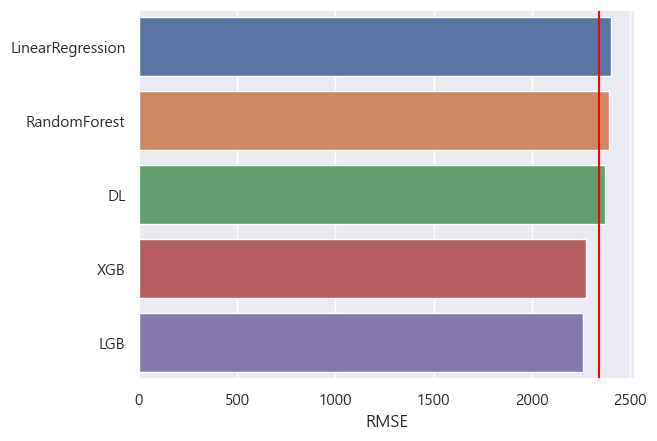

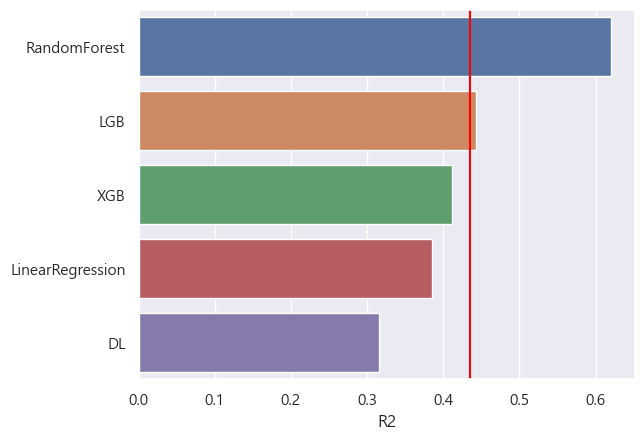

In [104]:
model_performance_df = pd.DataFrame(performance)
model_performance_df = model_performance_df.T

# Visualization - by RMSE
model_performance_df.sort_values(by='RMSE', ascending=False, inplace=True)

sns.barplot(x='RMSE', y=model_performance_df.index, data=model_performance_df)
plt.axvline(model_performance_df['RMSE'].mean(), color='red')
plt.show()

# Visualization - by R2
model_performance_df.sort_values(by='R2', ascending=False, inplace=True)

sns.barplot(x='R2', y=model_performance_df.index, data=model_performance_df)
plt.axvline(model_performance_df['R2'].mean(), color='red')
plt.show()

- 어느 모델이 더 좋다 말하기에 애매한 부분이 있는 것 같다.
- 다른 딥러닝 모델을 이용해 더 좋은 성능을 얻을 수 있지 않을까 생각도 들었으며
- Feature Engineering을 더욱 잘해 성능을 좋게 만들 수 밖에 없을 것 같다.